In [1]:
import sys
sys.path.append("../../")

from astronn.preprocess import predeltascuti
from astronn.datasets import deltascuti
from astronn import models

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Preprocess eleven delta scuti stars
preprocessor = predeltascuti()
preprocessor.preprocess_files(
    input_folder="../../astronn/data/deltascuti/raw/*",
    output_folder="../../astronn/data/deltascuti/preprocessed/",
)

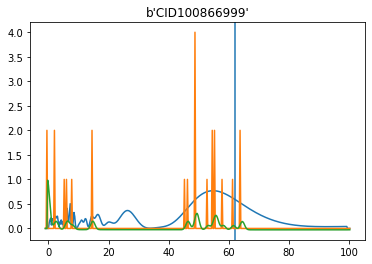

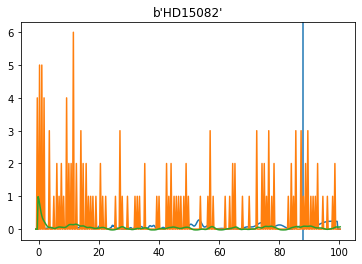

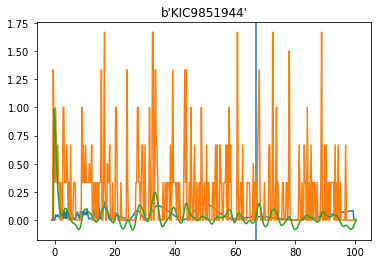

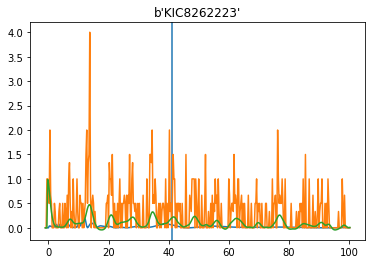

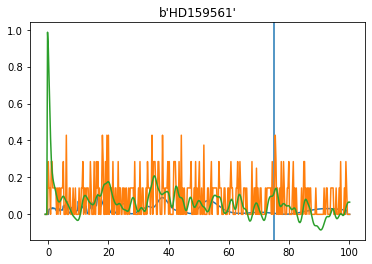

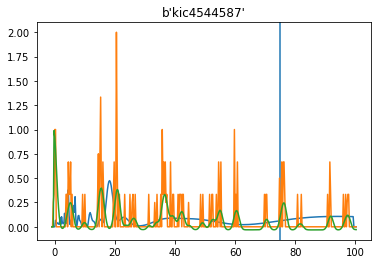

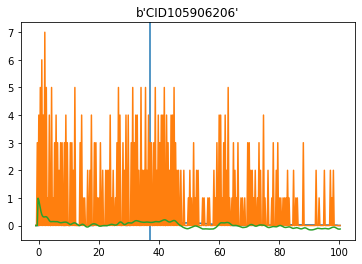

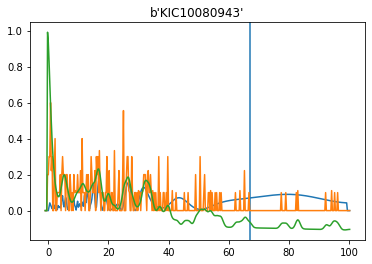

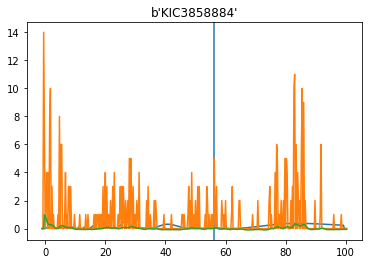

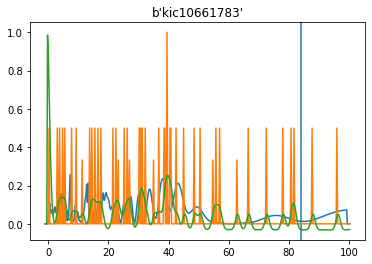

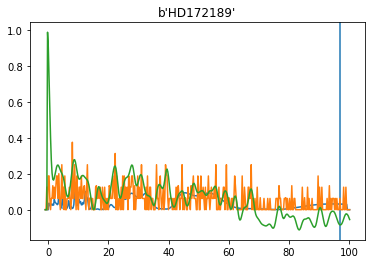

In [13]:
# Read datasets of preprocessed stars
df_ds = deltascuti()
df = df_ds.load("../../astronn/data/deltascuti/preprocessed/*", batch_size=1)

sepconv_mod = tf.keras.models.load_model("/tmp/sepconvnn")

x = np.arange(-1, 100.5, 0.25)
for line in df.take(11):
    plt.axvline(x=sepconv_mod.predict_classes(line[1]))
    aux = line[1][0,:,0].numpy()
    aux[np.isnan(aux)] = 0

    plt.title(line[0].numpy()[0])
    plt.plot(x, aux)
    plt.plot(x, line[1][0,:,1].numpy())
    plt.plot(x, line[1][0,:,2].numpy())
    plt.show()

In [7]:
line[1][0,:,0].numpy().shape

(406,)